# 量子相位估计

量子相位估计是量子计算中最重要的子程序之一，是许多量子算法的核心组成部分。该算法的目标如下：

给定一个幺正算符 $U$ ，算法估计 $U\vert\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$ 中的 $\theta$ 。其中 $|\psi\rangle$ 是特征向量， $e^{\boldsymbol{2\pi i}\theta}$ 是对应的特征值。由于 $U$ 是幺正的，所有特征值的模为1。

## 算法原理

量子相位估计算法利用相位反冲将 $U$ 的相位（在傅里叶基下）写入计数寄存器的 $t$ 个量子比特。然后使用逆QFT将其从傅里叶基转换到计算基，以便我们可以测量。

如上所述，量子线路估计幺正算符 $U$ 的相位。它估计 $U\vert\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$ 中的 $\theta$ ，其中 $|\psi\rangle$ 是特征向量， $e^{\boldsymbol{2\pi i}\theta}$ 是对应的特征值。线路按以下步骤运行：

1. **初始化**: $\vert\psi\rangle$ 在一组量子比特寄存器中。另一组 $n$ 个量子比特形成计数寄存器，我们将在其中存储值 $2^n\theta$ ：

$$ |\psi_0\rangle = \lvert 0 \rangle^{\otimes n} \lvert \psi \rangle$$

2. **叠加态**: 对计数寄存器应用 $n$ 比特Hadamard门操作 $H^{\otimes n}$ ：

$$ |\psi_1\rangle = {\frac {1}{2^{\frac {n}{2}}}}\left(|0\rangle +|1\rangle \right)^{\otimes n} \lvert \psi \rangle$$

3. **受控幺正操作**: 我们需要引入受控幺正 $CU$ ，它仅在其对应的控制比特为 $|1\rangle$ 时，在目标寄存器上应用幺正算符 $U$ 。由于 $U$ 是具有特征向量 $|\psi\rangle$ 的幺正算符，使得 $U|\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$ ，这意味着：

$$U^{2^{j}}|\psi \rangle =U^{2^{j}-1}U|\psi \rangle =U^{2^{j}-1}e^{2\pi i\theta }|\psi \rangle =\cdots =e^{2\pi i2^{j}\theta }|\psi \rangle$$

应用所有 $n$ 个受控操作 $CU^{2^j}$ ，其中 $0\leq j\leq n-1$ ，并使用关系 $|0\rangle \otimes |\psi \rangle +|1\rangle \otimes e^{2\pi i\theta }|\psi \rangle =\left(|0\rangle +e^{2\pi i\theta }|1\rangle \right)\otimes |\psi \rangle$ ：

$$
\begin{aligned}
|\psi_{2}\rangle & =\frac {1}{2^{\frac {n}{2}}} \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{n-1}}}|1\rangle \right) \otimes \cdots \otimes \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{1}}}\vert1\rangle \right) \otimes \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{0}}}\vert1\rangle \right) \otimes |\psi\rangle\\\\
& = \frac{1}{2^{\frac {n}{2}}}\sum _{k=0}^{2^{n}-1}e^{\boldsymbol{2\pi i} \theta k}|k\rangle \otimes \vert\psi\rangle
\end{aligned}
$$

其中 $k$ 表示 $n$ 位二进制数的整数表示。

4. **逆傅里叶变换**: QFT可以将 $n$ 量子比特输入态 $\vert x\rangle$ 映射到输出态

$$
QFT\vert x \rangle = \frac{1}{2^\frac{n}{2}}
\left(\vert0\rangle + e^{\frac{2\pi i}{2}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}x} \vert1\rangle\right) 
\otimes  
\ldots
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^{n-1}}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^n}x} \vert1\rangle\right) 
$$

将上面表达式中的 $x$ 替换为 $2^n\theta$ ，正好得到上面步骤2中推导的表达式。因此，为了恢复状态 $\vert2^n\theta\rangle$ ，在辅助寄存器上应用逆傅里叶变换。这样做，我们得到

$$
\vert\psi_3\rangle = \frac {1}{2^{\frac {n}{2}}}\sum _{k=0}^{2^{n}-1}e^{\boldsymbol{2\pi i} \theta k}|k\rangle \otimes | \psi \rangle \xrightarrow{\mathcal{QFT}_n^{-1}} \frac {1}{2^n}\sum _{x=0}^{2^{n}-1}\sum _{k=0}^{2^{n}-1} e^{-\frac{2\pi i k}{2^n}(x - 2^n \theta)} |x\rangle \otimes |\psi\rangle
$$ 

5. **测量**： 
上面的表达式在 $x = 2^n\theta$ 附近达到峰值。对于 $2^n\theta$ 为整数的情况，在计算基上测量以很高的概率在辅助寄存器中给出相位：

$$ |\psi_4\rangle = | 2^n \theta \rangle \otimes | \psi \rangle$$

对于 $2^n\theta$ 不是整数的情况，可以证明上面的表达式仍然在 $x = 2^n\theta$ 附近达到峰值，概率优于 $4/\pi^2 \approx 40\%$ [1]。

## 示例代码

首先，让我们准备环境，搭建量子电路。

In [9]:
from typing import Any, List, Optional, Union
import torch 
import deepquantum as dq
import numpy as np

class QuantumFourierTransform(dq.Ansatz):
    def __init__(
        self,
        nqubit: int,
        minmax: Optional[List[int]] = None,
        reverse: bool = False,
        init_state: Any = 'zeros',
        den_mat: bool = False,
        mps: bool = False,
        chi: Optional[int] = None,
        show_barrier: bool = False
    ) -> None:
        super().__init__(nqubit=nqubit, wires=None, minmax=minmax, ancilla=None, controls=None,
                         init_state=init_state, name='QuantumFourierTransform', den_mat=den_mat,
                         mps=mps, chi=chi)
        self.reverse = reverse
        for i in self.wires:
            self.qft_block(i)
            if show_barrier:
                self.barrier(self.wires)
        if not reverse:
            for i in range(len(self.wires) // 2):
                self.swap([self.wires[i], self.wires[-1 - i]])

    def qft_block(self, n):
        self.h(n)
        k = 2
        for i in range(n, self.minmax[1]):
            self.cp(i + 1, n, torch.pi / 2 ** (k - 1))
            k += 1

class QuantumPhaseEstimation(dq.Ansatz):
    def __init__(
        self,
        unitary: Any,
        t: int,
        t_a: int,
        den_mat: bool = False,
        mps: bool = False,
        chi: Optional[int] = None
    ) -> None:
        self.nqubit = t + t_a
        self.unitary=unitary
        super().__init__(nqubit=self.nqubit, wires=None, minmax=None, ancilla=None, controls=None,
                         init_state='zeros', name='QuantumPhaseEstimationQubit', den_mat=den_mat,
                         mps=mps, chi=chi)
  
        self.hlayer(list(range(t)))
        self.barrier()
        
        for i in range(t):
            self.any(unitary=np.linalg.matrix_power(self.unitary, 2 ** (t - i)),wires=list(range(t,self.nqubit)), controls=i)
        
        self.barrier()        
        iqft = QuantumFourierTransform(nqubit=self.nqubit, minmax=[0, t - 1],den_mat=self.den_mat, mps=self.mps, chi=self.chi).inverse()
        self.add(iqft)

        self.barrier()
        self.measure(wires=list(range(t)))

In [10]:
#例子参数：
qubit_measurement_num=4      ##定义测量比特数，测量比特的数量影响测量相位的精度。
qubit_auxiliary_num=2     ##定义辅助比特数，辅助比特的数量对应测量的酉矩阵大小。
phase =0.19    ##定义相位
unitary = [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,np.exp(1j*torch.pi * phase)]]  ##定义被测量的U矩阵，需要为酉矩阵
state=[0,0,0,1] ##定义U矩阵对应的特征向量,2^n维度,n为辅助比特数

In [11]:
qpe = QuantumPhaseEstimation(unitary=unitary,t=qubit_measurement_num, t_a=qubit_auxiliary_num)
state = dq.QubitState(qubit_measurement_num+qubit_auxiliary_num, state=state).state
qpe(state=state)
##测量得到答案
res = qpe.measure(wires=list(range(qubit_measurement_num)))
print(res)
max_key = max(res, key=res.get)
print(max_key)
phase_est = int(max_key, 2) / 2 ** qubit_measurement_num
print('估计相位为：'+str(phase_est))

{'0011': 1020, '0010': 1, '0100': 2, '0111': 1}
0011
估计相位为：0.1875


绘制量子相位估计的量子线路

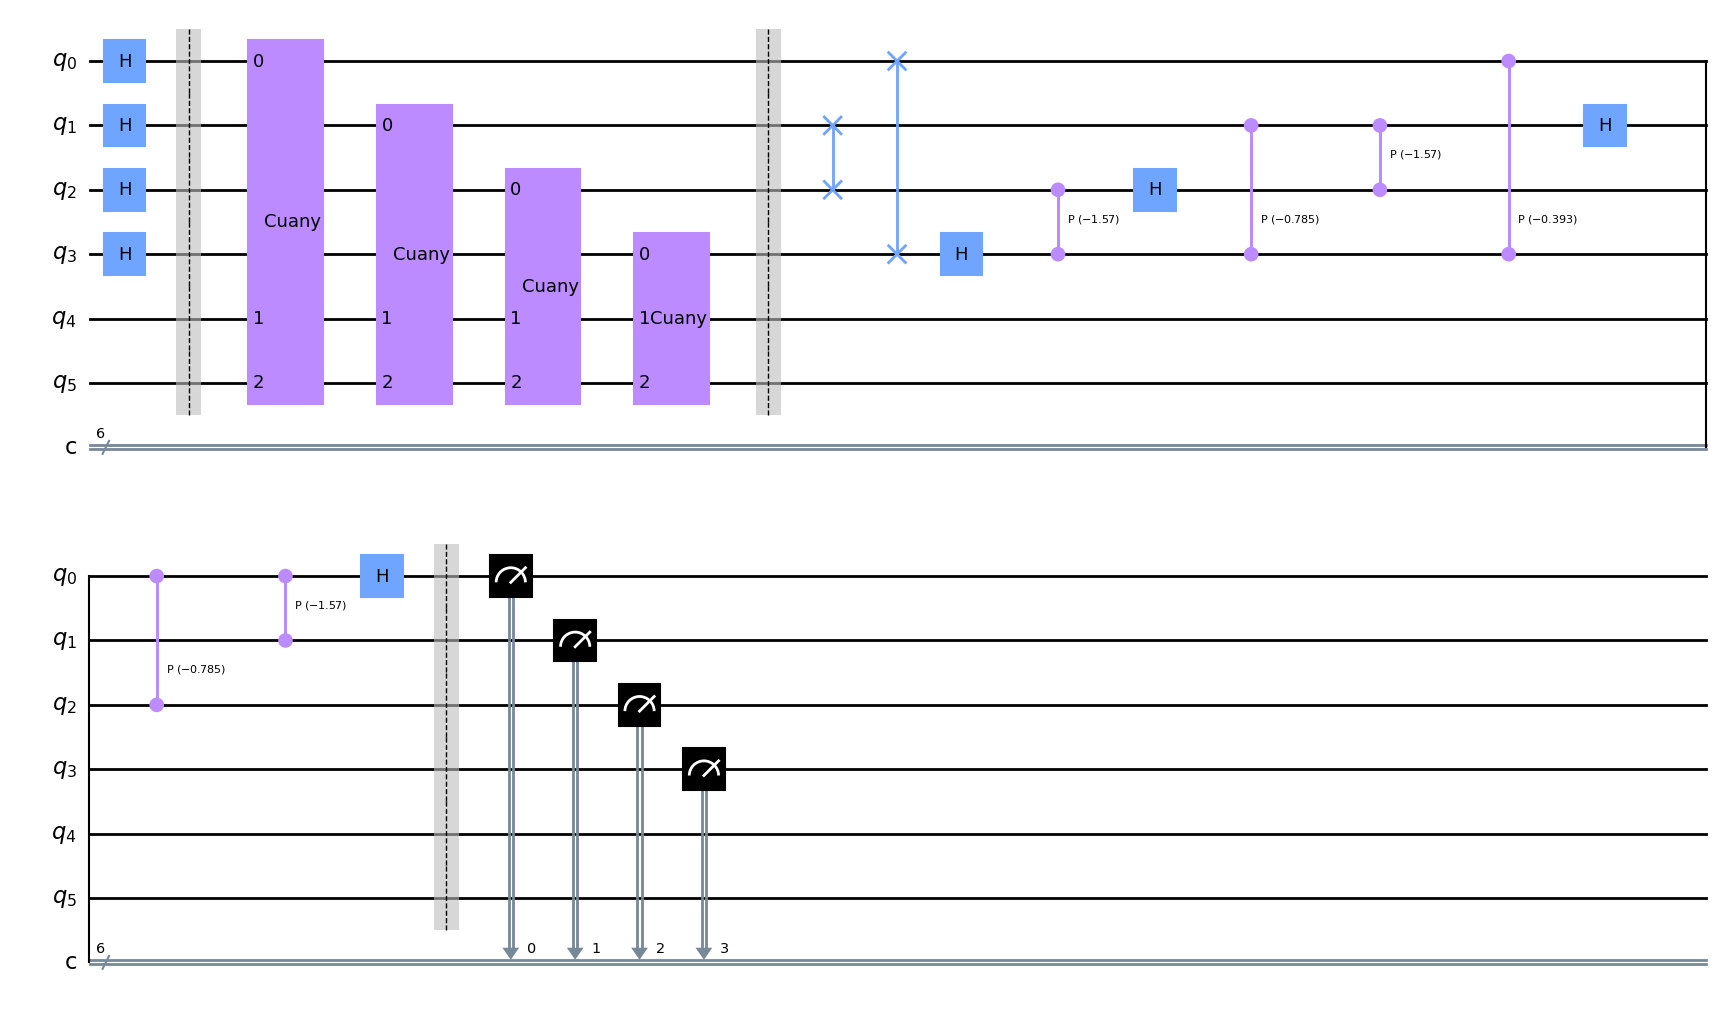

In [12]:
qpe.draw()  #绘制量子线路

## 附录

[1] Nielsen M A, Chuang I L. Quantum computation and quantum information[M]. Cambridge university press, 2010.